<a href="https://colab.research.google.com/github/Geoffrey-Z/Multivariate-Time-Series-Forecasting-with-LSTMs-in-Keras-for-CORN-SWEET-Terminal-Market-Price/blob/master/CORN_SWEET_Price_Weekly_Univariate_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving BI-COLOR PRICE weeks.csv to BI-COLOR PRICE weeks.csv


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 2s - loss: 0.0199 - mean_absolute_error: 0.1038
Epoch 2/1000
 - 1s - loss: 0.0086 - mean_absolute_error: 0.0711
Epoch 3/1000
 - 1s - loss: 0.0044 - mean_absolute_error: 0.0506
Epoch 4/1000
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0444
Epoch 5/1000
 - 1s - loss: 0.0036 - mean_absolute_error: 0.0436
Epoch 6/1000
 - 1s - loss: 0.0036 - mean_absolute_error: 0.0432
Epoch 7/1000
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0436
Epoch 8/1000
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0435
Epoch 9/1000
 - 1s - loss: 0.0036 - mean_absolute_error: 0.0432
Epoch 10/1000
 - 1s - loss: 0.0036 - mean_absolute_error: 0.0431
Epoch 11/1000
 - 1s - loss: 0.0036 - mean_absolute_error: 0.0431
Epoch 12/1000
 - 1s - loss: 0.0036 - mean_absolute_error: 0.0433
Epoch 13/1000
 - 1s - loss: 0.0036 - mean_absolute_error: 0.0433
Epoch 14/1000
 - 1s - loss: 0.0036 - mean_ab

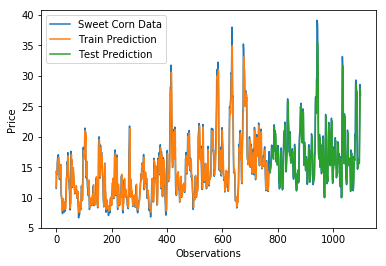

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, lookback=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)



np.random.seed(7)

import io

np.random.seed(7)

df = pd.read_csv(io.BytesIO(uploaded['BI-COLOR PRICE weeks.csv']), usecols=[1])
df = df.dropna()
dataset = df.values
dataset = dataset.astype("float32")

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

train_dataset = dataset[:int(len(dataset)*0.7), :]
test_dataset = dataset[int(len(dataset)*0.7):, :]

lookback = 1
trainX, trainY = create_dataset(train_dataset, lookback)
testX, testY = create_dataset(test_dataset, lookback)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
# Check LSTM
model.add(LSTM(4, input_shape=(1, lookback)))
#return_sequences=True, model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="Sweet Corn Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Observations")
plt.ylabel("Price")
plt.legend()
plt.show()

In [0]:
from keras.models import load_model
model.save('my_model.h5')

In [0]:
model = load_model('my_model.h5')

In [0]:
from sklearn.metrics import r2_score
trainScore = math.sqrt(r2_score(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f R2' % (trainScore))
testScore = math.sqrt(r2_score(testY[0], testPredict[:,0]))
print('Test Score: %.2f R2' % (testScore))

Train Score: 0.92 R2
Test Score: 0.85 R2
